# Airline exercise - Using seaborn

In [1]:
# Standard library imports
import urllib
import os

##############################################################################
# Load the data
import pandas as pd

if not os.path.exists('airfares.txt'):
    # Download the file if it is not present
    urllib.urlretrieve(
        'http://www.stat.ufl.edu/~winner/data/airq4.dat',
                       'airfares.txt')

In [2]:
# As a seperator, ' +' is a regular expression that means 'one of more
# space'
data = pd.read_csv('airfares.txt', sep=' +', header=0,
                       names=['city1', 'city2', 'pop1', 'pop2',
                              'dist', 'fare_2000', 'nb_passengers_2000',
                              'fare_2001', 'nb_passengers_2001'])

/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [3]:
data.isnull().sum()

city1                 0
city2                 0
pop1                  0
pop2                  0
dist                  0
fare_2000             0
nb_passengers_2000    0
fare_2001             0
nb_passengers_2001    0
dtype: int64

In [4]:
data.dtypes

city1                  object
city2                  object
pop1                  float64
pop2                  float64
dist                    int64
fare_2000             float64
nb_passengers_2000    float64
fare_2001             float64
nb_passengers_2001    float64
dtype: object

In [5]:
data.describe()

,pop1,pop2,dist,fare_2000,nb_passengers_2000,fare_2001,nb_passengers_2001
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,2374.313602,2553.085237,1046.739464,209.971777,226.807170,188.619916,206.645687
std,3307.548823,3736.648488,614.719882,70.641054,530.615384,59.703301,471.134564
min,14.870000,18.250000,72.000000,61.110000,10.000000,57.510000,10.000000
25%,503.950000,611.810000,565.500000,158.570000,30.942500,146.300000,28.335000
50%,1164.720000,1460.240000,910.500000,206.505000,61.840000,183.040000,57.655000
75%,2792.140000,2722.650000,1419.750000,254.522500,181.950000,228.367500,169.942500
max,19876.490000,19876.490000,2724.000000,529.700000,7676.410000,528.350000,8084.020000


In [6]:
data.head()

,city1,city2,pop1,pop2,dist,fare_2000,nb_passengers_2000,fare_2001,nb_passengers_2001
0,ABE,BNA,613.84,1134.52,685,272.26,24.45,284.89,20.86
1,ABE,CLE,613.84,2908.44,339,322.20,23.36,326.70,18.58
2,ABE,CLT,613.84,1350.24,480,250.27,52.60,241.53,35.76
3,ABE,CMH,613.84,1460.24,395,259.29,19.23,240.71,14.23
4,ABE,DEN,613.84,2318.36,1539,202.77,80.97,209.82,55.10


In [7]:
# we log-transform the number of passengers
import numpy as np
data['nb_passengers_2000'] = np.log10(data['nb_passengers_2000'])
data['nb_passengers_2001'] = np.log10(data['nb_passengers_2001'])

In [8]:
# Make a dataframe whith the year as an attribute, instead of separate columns

# We separate the dataframes in 2, one for year 2000, and one for 2001, before concatenating again.

# Make an index of each flight
data_flat = data.reset_index()

data_2000 = data_flat[['city1', 'city2', 'pop1', 'pop2',
                       'dist', 'fare_2000', 'nb_passengers_2000']]
# Rename the columns
data_2000.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist', 'fare',
                     'nb_passengers']
# Add a column with the year
data_2000['year'] = 2000

data_2001 = data_flat[['city1', 'city2', 'pop1', 'pop2',
                       'dist', 'fare_2001', 'nb_passengers_2001']]
# Rename the columns
data_2001.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist', 'fare',
                     'nb_passengers']
# Add a column with the year
data_2001['year'] = 2001

data_flat = pd.concat([data_2000, data_2001])

/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


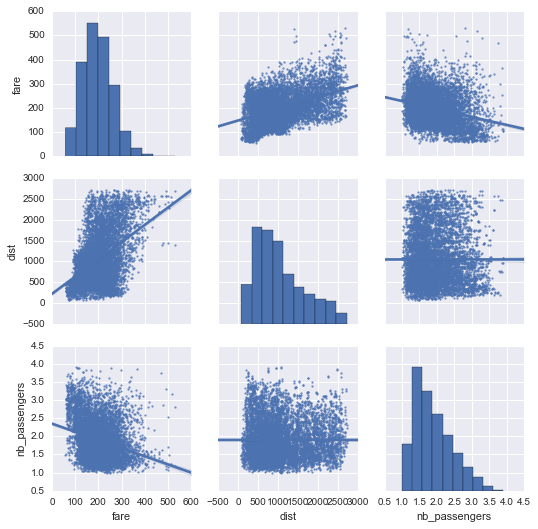

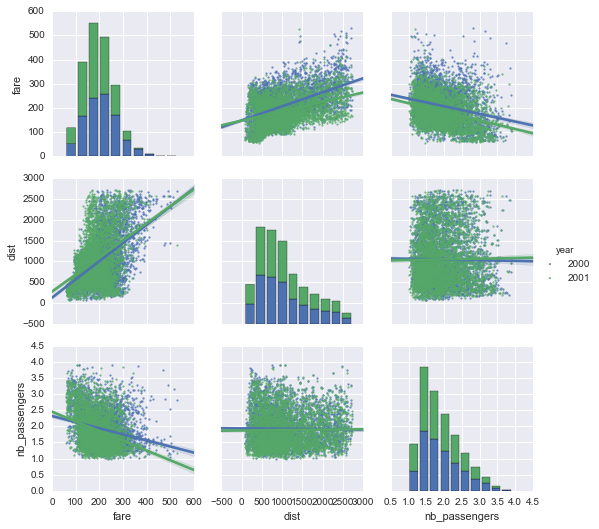

In [9]:
# Plot scatter matrices highlighting different aspects
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
seaborn.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
                 kind='reg', markers='.')

# A second plot, to show the effect of the year (ie the 9/11 effect)
seaborn.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
                 kind='reg', hue='year', markers='.')

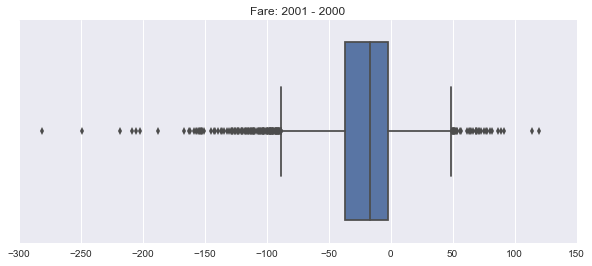

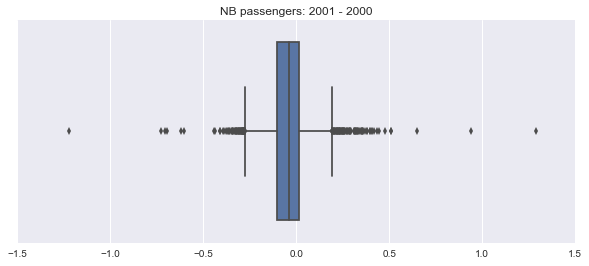

In [10]:
# Plot the difference in fare

plt.figure(figsize=(10, 4))
seaborn.boxplot(data.fare_2001 - data.fare_2000)
plt.title('Fare: 2001 - 2000')
plt.subplots_adjust()

plt.figure(figsize=(10, 4))
seaborn.boxplot(data.nb_passengers_2001 - data.nb_passengers_2000)
plt.title('NB passengers: 2001 - 2000')
plt.subplots_adjust()

In [11]:
# Statistical testing: dependence of fare on distance and number of
# passengers
import statsmodels.formula.api as sm

result = sm.ols(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1585.
Date:                Sun, 19 Feb 2017   Prob (F-statistic):               0.00
Time:                        17:50:48   Log-Likelihood:                -45532.
No. Observations:                8352   AIC:                         9.107e+04
Df Residuals:                    8349   BIC:                         9.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       211.2428      2.466     85.669      0.000       206.409   216.076
dist              0.0484      0.001     48.149      0.000         0.046     0.050
nb_passengers   -32.8925      1.127    -29.191      0.000       -35.101   -30.684
==============================================================================
Omnibus:                      604.051   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.733
Skew:                           0.710   Prob(JB):                    1.42e-161
Kurtosis:                       3.338   Cond. No.                     5.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Using a robust fit
result = sm.rlm(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   fare   No. Observations:                 8352
Model:                            RLM   Df Residuals:                     8349
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 19 Feb 2017                                         
Time:                        17:50:48                                         
No. Iterations:                    12                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       215.0848      2.448     87.856      0.000       210.287   219.883
dist              0.0460      0.001     46.166      0.000         0.044     0.048
nb_passengers   -35.2686      1.119    -31.526      0.000       -37.461   -33.076
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [13]:
# Statistical testing: regression of fare on distance: 2001/2000 difference

#result = sm.ols(formula='fare_2001 - fare_2000 ~ 1 + dist', data=data).fit()
result = sm.ols(formula='fare_2001 - fare_2000 ~ dist + 1', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              fare_2001   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     791.7
Date:                Sun, 19 Feb 2017   Prob (F-statistic):          1.20e-159
Time:                        17:50:49   Log-Likelihood:                -22640.
No. Observations:                4176   AIC:                         4.528e+04
Df Residuals:                    4174   BIC:                         4.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    148.0279      1.673     88.480      0.0

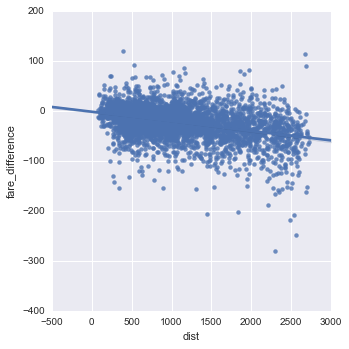

In [14]:
# Plot the corresponding regression
data['fare_difference'] = data['fare_2001'] - data['fare_2000']
seaborn.lmplot(x='dist', y='fare_difference', data=data)

#data['fare_difference'] = data['fare_2001'] - data['fare_2000']
#seaborn.regplot(x='fare_2000', y='fare_2001', data=data)
plt.show()

In [15]:
from scipy import stats

In [16]:
stats.ttest_1samp(data.fare_2000-data.fare_2001,0)

Ttest_1sampResult(statistic=43.639972547561847, pvalue=0.0)

In [ ]:
result = sm.ols(formula='fare_2001 - fare_2000 ~ dist + 1', data=data).fit()
print(result.summary())